In [1]:
from typing import List, Dict, Any
from langgraph.graph import StateGraph, END

In [4]:
def step_read_pdf(state):
    # text = self.read_pdf_file(pdf_path)
    return {"pdf_text": "text"}

def step_brd(state):
        # flag, brd = self.generate_brd(state["pdf_text"])
        # if not flag:
        #     raise ValueError("BRD generation failed — got empty text.")
        # save_text_to_file(brd, r"D:\AI\AI-Projects/Product_generatror\docs\brd.txt")
    return {"brd_text": "brd"}

def step_validate_brd(state):
    """Step: Validate BRD completeness before generating stories."""
    # brd_text = state.get("brd_text", "")
    # if not brd_text:
    #     raise KeyError("Missing BRD text for validation.")

    # is_complete, validation_json = self.validate_brd_completeness(brd_text)

    # print(
    #     "BRD Completeness Confidence:",
    #     validation_json.get("completeness_confidence"),
    # )
    # print("BRD Status:", "Complete" if is_complete else "Incomplete")
    # print("Missing Sections:", validation_json.get("missing_sections"))

    # if not is_complete:
    #     print("Aborting: BRD is not complete enough to generate user stories.")
    #     return {
    #         "abort": True,
    #         "brd_validation": validation_json,
    #         "message": "BRD is incomplete — please review missing sections before proceeding.",
    #     }

    return {
        "abort": False,
        "brd_validation": "validation_json",
        "brd_text": "brd_text",
        "message": "BRD validated successfully.",
    }

def step_user_stories(state):
        # stories = self.generate_user_stories(state["brd_text"])
        # if not stories:
        #     raise ValueError("User story generation failed — got empty stories.")
    return {
        "stories": "stories",
        "brd_validation": state["brd_validation"],
        "brd_text": state["brd_text"],
    }

def step_validate_stories(state):
        # validation_prompt = self.prompts.get_prompt(
        #     "validate_story_with_brd",
        #     BRD_TEXT=state.get("brd_text", ""),
        #     STORIES_TEXT=str(state.get("stories", "")),
        # )

        # validation_output = self.llm_bot.llm_bot(validation_prompt)

        # try:
        #     is_valid, validation_json = self.user_story_validator(validation_output)
        # except Exception as e:
        #     print(f"Error during validation: {e}")
        #     return {
        #         "validation_result": "Error during story validation",
        #         "confidence": 0,
        #         "story_validation": {},
        #         "stories": state["stories"],
        #         "brd_validation": state["brd_validation"],
        #         "brd_text": state["brd_text"],
        #     }

        # print("Validation Confidence:", validation_json.get("alignment_confidence"))
        # print("Validation Status:", "Passed" if is_valid else "Failed")

    return {
        "stories": state["stories"],
        "brd_validation": state["brd_validation"],
        "brd_text": state["brd_text"],
    }
    
def step_create_ticket_on_jira(state):
    # text = self.read_pdf_file(pdf_path)
    return {"pdf_text": "text"}

# Build LangGraph
graph = StateGraph(dict)
graph.add_node("Read_pdf", step_read_pdf)
graph.add_node("Create_brd", step_brd)
graph.add_node("Validate_brd", step_validate_brd)
graph.add_node("Create_stories", step_user_stories)
graph.add_node("Validate_stories", step_validate_stories)
graph.add_node("Create_jira_ticket", step_create_ticket_on_jira)

graph.set_entry_point("Read_pdf")
graph.add_edge("Read_pdf", "Create_brd")
graph.add_edge("Create_brd", "Validate_brd")
graph.add_conditional_edges(
    "Validate_brd",
    lambda state: "end" if state.get("abort") else "continue",
    {"end": END, "continue": "Create_stories"},
)

graph.add_edge("Create_stories", "Validate_stories")
graph.add_edge("Validate_stories", "Create_jira_ticket")
graph.add_edge("Create_jira_ticket", END)

app = graph.compile()


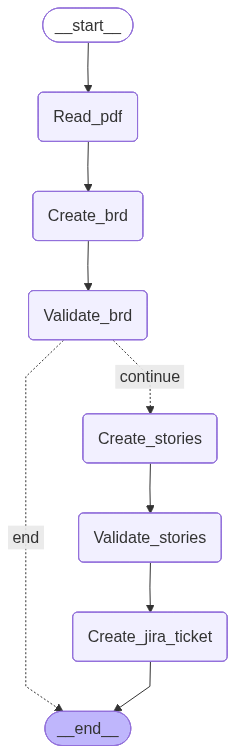

In [5]:
app